In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("combined.csv")
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2015-01,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,04 TO 06,74.0,Improved,1979,388000.0,63,54
1,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2016-03,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,350000.0,62,54
2,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-04,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,340000.0,61 years 05 months,54
3,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-05,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,322000.0,61 years 05 months,54
4,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-06,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,370000.0,61 years 03 months,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202178,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2021-12,BUKIT MERAH,4 ROOM,9B,BOON TIONG RD,10 TO 12,92.0,Model A,2016,928000.0,93 years 02 months,91
202179,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2022-09,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,16 TO 18,112.0,Improved,2016,1280000.0,92 years 05 months,91
202180,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-02,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,25 TO 27,112.0,Improved,2016,1290000.0,91 years 11 months,91
202181,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-05,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,07 TO 09,112.0,Improved,2016,1278000.0,91 years 09 months,91


In [3]:
df.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code              int64
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
lease_remain_years       int64
dtype: object

In [4]:
df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

In [5]:
df.dropna(inplace= True)
df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

In [6]:
def storey_conversion(x):
    S_range = x.split('TO')
    Float_range = [float(i) for i in S_range]
    S_median = statistics.median(Float_range)
    return S_median
df['storey_median'] = df['storey_range'].apply(lambda x :storey_conversion(x))

In [7]:
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2015-01,KALLANG/WHAMPOA,...,1,BEACH RD,04 TO 06,74.0,Improved,1979,388000.0,63,54,5.0
1,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2016-03,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,350000.0,62,54,8.0
2,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-04,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,340000.0,61 years 05 months,54,8.0
3,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-05,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,322000.0,61 years 05 months,54,8.0
4,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-06,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,370000.0,61 years 03 months,54,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202178,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2021-12,BUKIT MERAH,...,9B,BOON TIONG RD,10 TO 12,92.0,Model A,2016,928000.0,93 years 02 months,91,11.0
202179,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2022-09,BUKIT MERAH,...,9B,BOON TIONG RD,16 TO 18,112.0,Improved,2016,1280000.0,92 years 05 months,91,17.0
202180,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-02,BUKIT MERAH,...,9B,BOON TIONG RD,25 TO 27,112.0,Improved,2016,1290000.0,91 years 11 months,91,26.0
202181,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-05,BUKIT MERAH,...,9B,BOON TIONG RD,07 TO 09,112.0,Improved,2016,1278000.0,91 years 09 months,91,8.0


In [8]:
df_final = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
df_final

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,2715.822202,457.092359,74.0,54,5.0,388000.0
1,2715.822202,457.092359,68.0,54,8.0,350000.0
2,2715.822202,457.092359,68.0,54,8.0,340000.0
3,2715.822202,457.092359,68.0,54,8.0,322000.0
4,2715.822202,457.092359,68.0,54,8.0,370000.0
...,...,...,...,...,...,...
202178,2525.251132,182.864524,92.0,91,11.0,928000.0
202179,2525.251132,182.864524,112.0,91,17.0,1280000.0
202180,2525.251132,182.864524,112.0,91,26.0,1290000.0
202181,2525.251132,182.864524,112.0,91,8.0,1278000.0


In [9]:
df_final[df_final.duplicated()]

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
8,2715.822202,457.092359,68.0,54,8.0,340000.0
16,2715.822202,457.092359,68.0,54,8.0,328000.0
27,10082.515936,540.879412,59.0,51,14.0,305000.0
46,10082.515936,540.879412,59.0,51,14.0,305000.0
50,10082.515936,540.879412,59.0,51,8.0,340000.0
...,...,...,...,...,...,...
201911,4991.190869,115.221540,56.0,44,8.0,320000.0
201986,18395.479553,412.071756,52.0,83,8.0,240000.0
202065,11860.773649,1320.686197,113.0,93,5.0,658000.0
202094,11827.733979,1291.639824,113.0,93,5.0,680000.0


In [10]:
df_final=df_final.drop_duplicates()
df_final

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,2715.822202,457.092359,74.0,54,5.0,388000.0
1,2715.822202,457.092359,68.0,54,8.0,350000.0
2,2715.822202,457.092359,68.0,54,8.0,340000.0
3,2715.822202,457.092359,68.0,54,8.0,322000.0
4,2715.822202,457.092359,68.0,54,8.0,370000.0
...,...,...,...,...,...,...
202178,2525.251132,182.864524,92.0,91,11.0,928000.0
202179,2525.251132,182.864524,112.0,91,17.0,1280000.0
202180,2525.251132,182.864524,112.0,91,26.0,1290000.0
202181,2525.251132,182.864524,112.0,91,8.0,1278000.0


In [11]:
df_final.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
resale_price          float64
dtype: object

<Axes: title={'center': 'Correlation Heatmap'}>

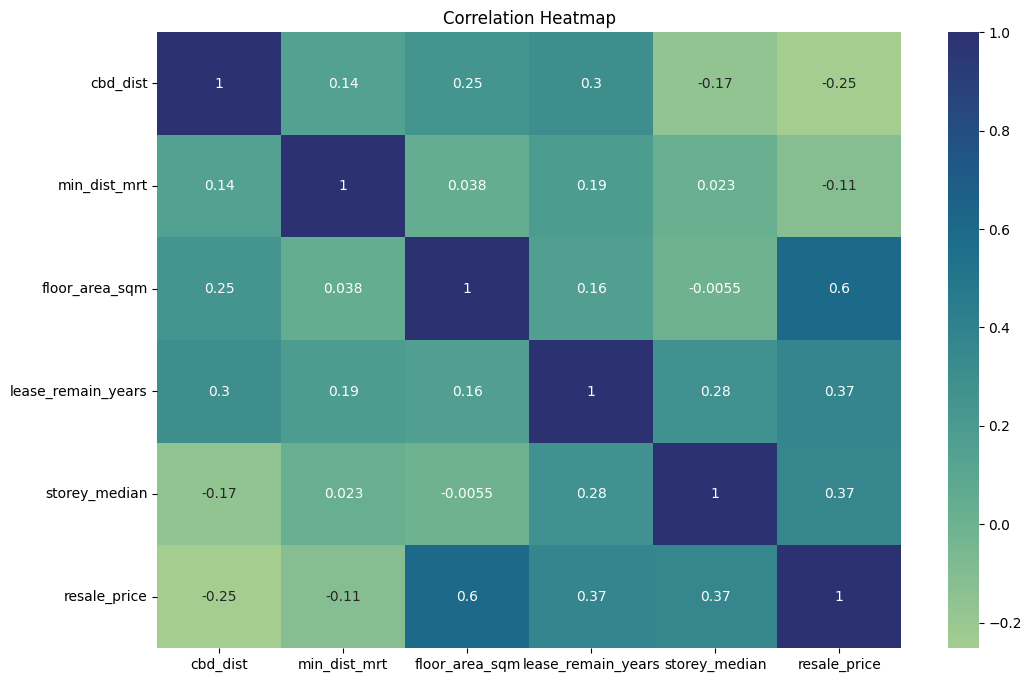

In [12]:
corr = df_final.corr()
plt.figure(figsize=(12, 8))
plt.title("Correlation Heatmap")
sns.heatmap(
    corr, 
    cmap='crest', 
    annot=True
)

<Axes: xlabel='resale_price', ylabel='Count'>

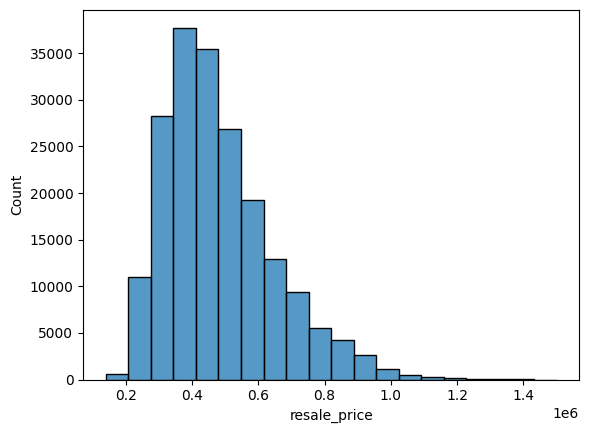

In [13]:
sns.histplot(df_final.resale_price,bins= 20)

In [14]:

X=df_final[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df_final['resale_price']
X

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median
0,2715.822202,457.092359,74.0,54,5.0
1,2715.822202,457.092359,68.0,54,8.0
2,2715.822202,457.092359,68.0,54,8.0
3,2715.822202,457.092359,68.0,54,8.0
4,2715.822202,457.092359,68.0,54,8.0
...,...,...,...,...,...
202178,2525.251132,182.864524,92.0,91,11.0
202179,2525.251132,182.864524,112.0,91,17.0
202180,2525.251132,182.864524,112.0,91,26.0
202181,2525.251132,182.864524,112.0,91,8.0


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

algo = {
    'Linear_Regression':{
        'model' : LinearRegression(),
        'params': {'fit_intercept':[True,False]}},
    'Decision_Tree':{
        'model' : DecisionTreeRegressor(),
        'params': {
            'max_depth': [2, 5, 10, 15, 20, 22],
            'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
            'max_features': ['auto', 'sqrt', 'log2']}}
        }

score = []
models = []
for algo_name ,config in algo.items():
    grid_search = GridSearchCV(config['model'],config['params'], cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    models.append(best_model)
    train_pred = best_model.predict(X_train)
    y_pred = best_model.predict(X_test)
    score.append({
        'model': algo_name,
        'Mean squared error': mean_squared_error(y_test, y_pred),
        'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
        'Root Mean squared error':  np.sqrt(mean_squared_error(y_test, y_pred)),
        'R-squared': r2_score(y_test, y_pred),
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
        
    })
table = pd.DataFrame(score)

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1320 fits failed out of a total of 3960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

In [35]:
table

,model,Mean squared error,Mean Absolute Error,Root Mean squared error,R-squared,best_score,best_params
0,Linear_Regression,6.727260e+09,64674.329434,82019.876376,0.754500,0.753679,{'fit_intercept': True}
1,Decision_Tree,3.473187e+09,45030.038372,58933.754425,0.873252,0.869141,"{'max_depth': 20, 'max_features': 'log2', 'min..."


In [50]:
models[1].

DecisionTreeRegressor(max_depth=20, max_features='log2', min_samples_leaf=9,
                      min_samples_split=3)

In [64]:
new_perd = np.array([[8740, 999, 44, 55, 11]])
models[1].predict(new_perd)[0]
# new_perd

230789.47368421053

In [66]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(models[1], file)